# Weekly XMU
Using data analysis, data visualization techniques to know what happened this week at xiamen university


Idea: do word cloud to analyze the news content of xiamen university this week, data source: xiamen university news.


## Step 1: Crawl data

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# Get all news text content
def getAllText(dateRange):
    links = getLinkList(dateRange)
    allText = ""
    for link in links:
        newsText = getNewText(link)
        allText = allText + "\n" + newsText
    dateRange = dateRange.replace("/", "")
    with open('doc//allText_'+dateRange+'.txt', 'w', encoding='utf-8') as fw:
        fw.write(allText)
    return allText

In [3]:
# Get a single news text
def getNewText(newspage):
    url = "https://news.xmu.edu.cn" + newspage
    newsText = ""
    r = requests.get(url)
    r.encoding = "utf-8"
    soup = BeautifulSoup(r.text, 'html.parser')
    for item in soup.find_all('p'):
        newsText = newsText + "\n" +item.text
    return newsText

In [73]:
# Gets links to a news page within a certain date range
def getLinkList(dateRange):
    links = []
    for i in range(0,20):
        url = "https://news.xmu.edu.cn/1552/list"+ str(i) + ".htm"
        r = requests.get(url)
        r.encoding = "utf-8"
        soup = BeautifulSoup(r.text, 'html.parser')
        for item in soup.find_all('a'):
            link = item.get('href')
            if link[0:9] == dateRange:
#                 print(item.get('href'))
                links.append(item.get('href'))
    return links

## Step 2 :Chinese words segmentation

In [49]:
from collections import Counter
from os import path
import jieba
import os
stopword_list = ["厦门大学","我校","中国","进行","开展","以及","通过","大家","责任编辑","曹熠婕", "学院",
                "相关","了解","自己","学校","同时","作为","进一步","重要","表示","过程","上午","下午","晚上","厦大",
                "及其"]

In [39]:

def word_segment(text):
    '''
    通过jieba进行分词并通过空格分隔,返回分词后的结果
    '''

    # 计算每个词出现的频率，并存入txt文件
    jieba_word=jieba.cut(text,cut_all=False) # cut_all是分词模式，True是全模式，False是精准模式，默认False
    data=[]
    seg_list = ""
    for word in jieba_word:
        isStopWord = 0
        for sw in stopword_list:
            if sw in word:
                isStopWord = isStopWord+1
        if isStopWord:
            continue
        else:
            data.append(word)
            seg_list = seg_list+" "+word
    dataDict=Counter(data)
    with open('doc//词频统计.txt','w', encoding='utf-8') as fw:
        for k,v in dataDict.items():
            fw.write("%s,%d\n" % (k,v))
        #  fw.write("%s"%dataDict)

    return seg_list

## Step 3: Generate Wordcloud

In [13]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
 

In [14]:

def generate_wordcloud(text):
    '''
    输入文本生成词云,如果是中文文本需要先进行分词处理
    '''
    # 设置显示方式
    d=os.path.abspath('')
    my_mask = np.array(Image.open(path.join(d, "Images//log.png")))
    font_path=path.join(d,"font//msyh.ttf")
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",# 设置背景颜色
           max_words=500, # 词云显示的最大词数  
           #mask=my_mask,# 设置背景图片
           stopwords=stopwords, # 设置停用词
           font_path=font_path, # 兼容中文字体，不然中文会显示乱码
                  )

    # 生成词云 
    wc.generate(text)

    # 显示图像
    plt.figure(figsize=(16,9)) 
    plt.imshow(wc, interpolation='bilinear')
    # interpolation='bilinear' 表示插值方法为双线性插值
    plt.axis("off")# 关掉图像的坐标
    plt.savefig('wc.jpg', dpi=300)
    plt.show()

## Demo 2019.07.20+

In [56]:
dateRange = "/2019/072"
allText = getAllText(dateRange)

In [57]:
seg_word_list = word_segment(allText)
# print(seg_word_list)

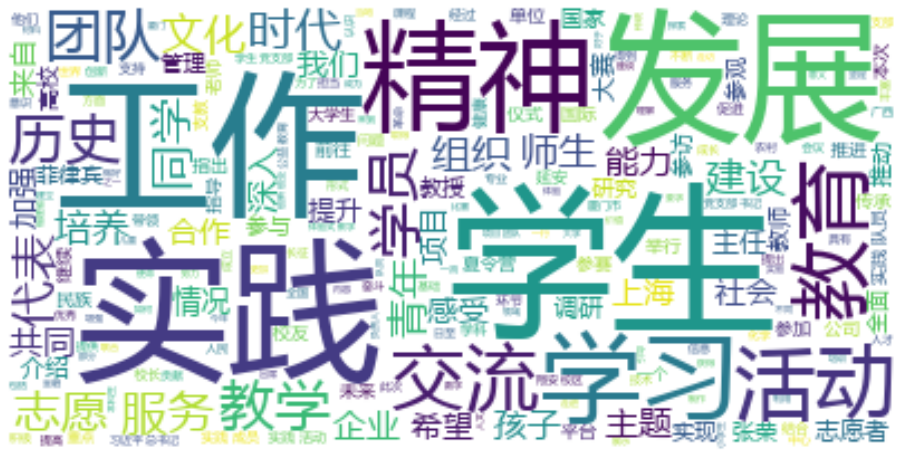

In [58]:
generate_wordcloud(seg_word_list)

# Demo 2019.07.10+

In [59]:
dateRange = "/2019/071"
allText = getAllText(dateRange)

In [60]:
seg_word_list = word_segment(allText)

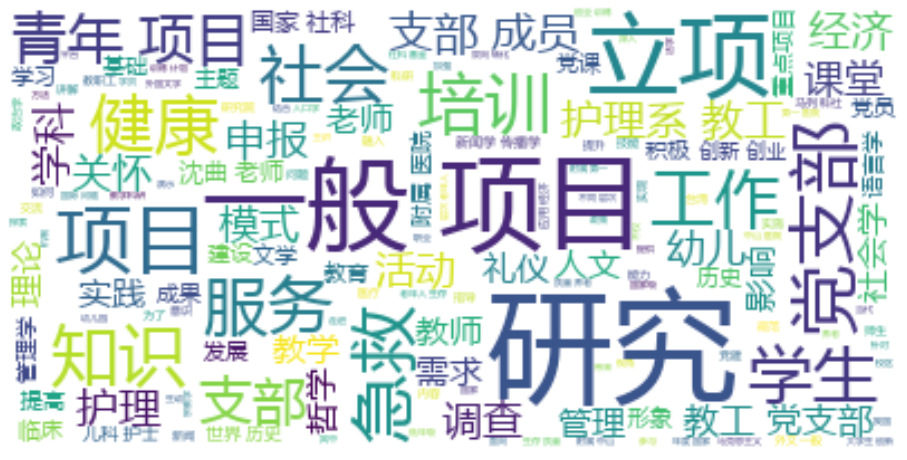

In [61]:
generate_wordcloud(seg_word_list)

# Demo 2019.07.00+

In [74]:
dateRange = "/2019/070"
allText = getAllText(dateRange)

In [77]:
seg_word_list = word_segment(allText)
# print(seg_word_list)

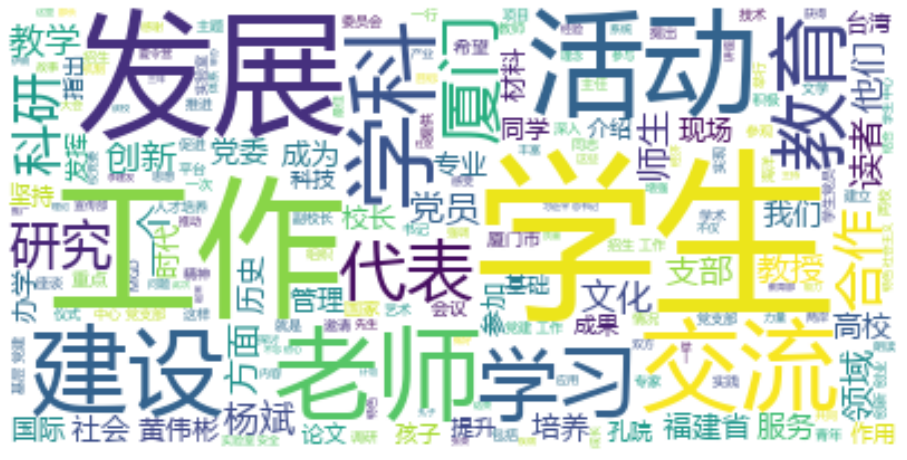

In [76]:
generate_wordcloud(seg_word_list)

In [ ]:
# 2019.06.20+
